# 3. Tableaux de données et démographie
---

On veut décrire l'évolution d'une population $N$ en fonction du temps, connaissant son taux de natalité $\tau_n$ et de mortalité $\tau_m$ annuels, supposées constants: c'est le modèle de Malthus.\
La population l'année suivante $N_{i+1}$ s'obtient connaissant l'effectif de l'année en cours $N_i$, le nombre total de naissances $N_{n,i} = \tau_n \; N_i$ et le nombre total de décès $N_{d,i} = \tau_m \; N_i$ selon:\
$$N_{i+1} = N_i + N_{n,i} - N_{d,i} $$
$$N_{i+1} = N_i + \tau_n \; N_i - \tau_m \; N_i$$
$$N_{i+1} = N_i + N_i \times \left(\tau_n  - \tau_m \right)$$
Soit en posant $b =  \tau_n  - \tau_m$ :
$$N_{i+1} = N_i + b N_i$$

Si la natalité est supérieure à la mortalité, $b>0$ et la population croît. Construisons tout ça par récurrence.

In [1]:
import numpy as np

Commençons par déclarer nos variables:

In [2]:
tn = 0.02 # taux de natalité de 2% = 0.02
tm = 0.01 # taux de mortalité de 1% = 0.01
N0 = 1000 # taille initiale de la population
durée = 100 # on simule l'évolution pendant 100 ans
b = tn - tm # le paramètre b. 

Construisons la liste des années:

In [3]:
t = np.arange(durée)

Construisons maintenant par récurrence l'évolution de la population dans une liste:

In [4]:
N = [N0] # initialisation par création d'une liste contenant le premier élément

for i in range(1, len(t)):
    N.append(N[i-1] + b*N[i-1])
    
print(N[0:10]) # affiche les 10 premières valeurs de N

[1000, 1010.0, 1020.1, 1030.301, 1040.60401, 1051.0100501, 1061.5201506009998, 1072.1353521070098, 1082.85670562808, 1093.6852726843606]


Etant donné que l'on parle de l'effectif d'une poulation, on aimerait bien travailler avec des valeurs entières .
On va modifier le code pour que les valeurs stockées dans la liste soient entière, avec l'instruction `int()` *(entier se dit integer en anglais, lorsqu'il s'agit de qualifier un nombre)*.


In [5]:
N = [N0] # initialisation

for i in range(1, len(t)):
    N.append(int(N[i-1] + b*N[i-1]))
    
print(N[0:10]) # affiche les 10 premières valeurs de N

[1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090]


On voit que cette technique fait perdre un peu d'information *(1090 au lieu de 1093...)*. Essayons avec la fonction `round()`:

In [6]:
N = [N0] # initialisation

for i in range(1, len(t)):
    N.append(round(N[i-1] + b*N[i-1]))
    
print(N[0:10]) # affiche les 10 premières valeurs de N

[1000, 1010, 1020, 1030, 1040, 1050, 1060, 1071, 1082, 1093]


C'est mieux. On peut maintenant représenter tout ça sur un graphique:

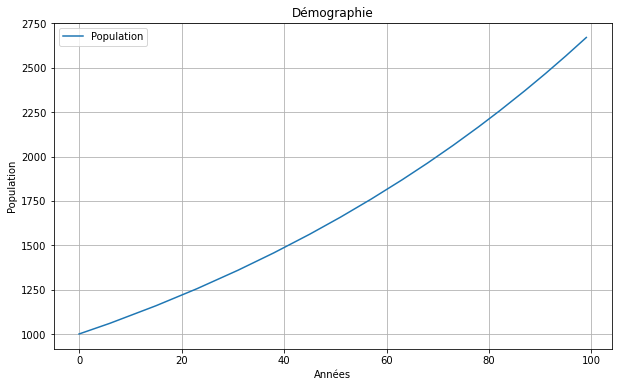

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 
plt.plot(t, N, label='Population')
plt.xlabel('Années')
plt.ylabel('Population')
plt.title('Démographie')
plt.legend()
plt.grid(True)
plt.show()

Peut-on voir l'influence du paramètre b sur la dynamique de population? C'est possible en créant un curseur avec la bibliothèque `ipywidgets` et son module `interact`: 

In [8]:
from ipywidgets import interact

@interact
def population (B=(-1, 1, 0.01)): # B varie de -1 à +1 par pas de 0.01. Je l'appelle B au lieu de b 
                                  # pour ne pas risquer de conflits avec le b minuscule précédent.
    N = [N0] # initialisation
    for i in range(1, len(t)):
        N.append(round(N[i-1] + B*N[i-1]))
    plt.figure(figsize=(10,6)) 
    plt.plot(t, N, label='Population')
    plt.xlabel('Années')
    plt.ylabel('Population')
    plt.title('Démographie')
    plt.legend()
    plt.grid(True)
    plt.xlim([-1, 100])
    plt.ylim([-1,1E6])
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='B', max=1.0, min=-1.0, step=0.01), Output()), _dom_c…

Une belle croissance exponentielle!

---

# Le code en résumé: 

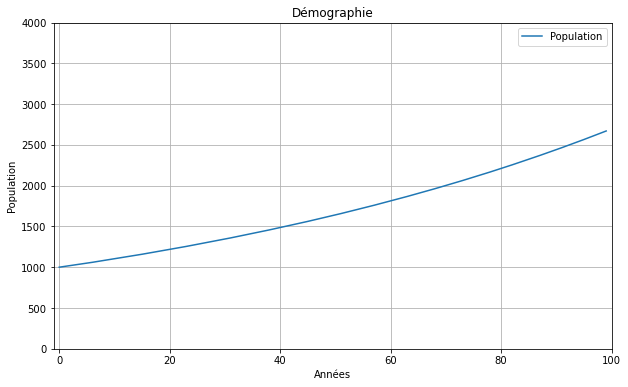

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

tn = 0.02 # taux de natalité de 2% = 0.02
tm = 0.01 # taux de mortalité de 1% = 0.01
N0 = 1000 # taille initiale de la population
durée = 100 # on simule l'évolution pendant 100 ans
b = tn - tm # le paramètre b. 

t = np.arange(durée)

N = [N0]
for i in range(1, len(t)):
    N.append(round(N[i-1] + b*N[i-1]))
    
plt.figure(figsize=(10,6)) 
plt.plot(t, N, label='Population')
plt.xlabel('Années')
plt.ylabel('Population')
plt.title('Démographie')
plt.legend()
plt.grid(True)
plt.xlim([-1, 100])
plt.ylim([-1, 4000])
plt.show()

---

On peut vouloir regrouper les listes dans un tableur, comme Libre Office. On utilise pour cela la bibliothèque `pandas`, qui va nous permettre de gérer des tableaux de valeurs *(dataframe en anglais)*.

In [10]:
import pandas as pd

Créons notre tableau colonne par colonne, avec la commande `pd.DataFrame({'Titre col1' : col1, etc..})` et affichons le début du tableau avec la commande `tableau.head()`:

In [11]:
data = pd.DataFrame({'An': t,
                     'Pop' : N})
data.head()

,An,Pop
0,0,1000
1,1,1010
2,2,1020
3,3,1030
4,4,1040


Tracer un graphique n'a jamais été aussi simple avec pandas:

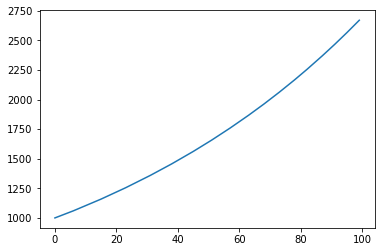

In [12]:
data['Pop'].plot()